In [1]:
from google.colab import drive

drive.mount('/content/MyDrive/')

Drive already mounted at /content/MyDrive/; to attempt to forcibly remount, call drive.mount("/content/MyDrive/", force_remount=True).


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, concatenate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

In [3]:
def build_train_test_cnn_model(X_train, y_train, X_val, y_val, X_test, y_test, filters=32, kernel_size=3, pool_size=2,
                           dense_units=128, dropout_rate=0.5, epochs=10, batch_size=32, learning_rate=0.001,
                           use_early_stopping=True, patience=3, num_conv_layers=2):

    physical_devices = tf.config.list_physical_devices('GPU')
    if physical_devices:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
        print("GPU is available.")
    else:
        print("No GPU detected. Running on CPU.")

    model = Sequential()

    for i in range(num_conv_layers):
        model.add(Conv1D(filters=filters*(2**i), kernel_size=kernel_size, activation='relu',
                         input_shape=(X_train.shape[1], 1)))
        model.add(MaxPooling1D(pool_size=pool_size))

    model.add(Flatten())
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    callbacks = []
    if use_early_stopping:
        early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
        callbacks.append(early_stopping)

    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val),
                        callbacks=callbacks, verbose=1)

    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)


    test_accuracy = accuracy_score(y_test, y_pred_binary)
    precision = precision_score(y_test, y_pred_binary)
    recall = recall_score(y_test, y_pred_binary)
    f1 = f1_score(y_test, y_pred_binary)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
    sensitivity = tp / (tp + fn)
    cm = confusion_matrix(y_test, y_pred_binary)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.show()

    _, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

    return test_accuracy, precision, recall, f1, sensitivity

In [4]:
train_data = pd.read_csv('./MyDrive/MyDrive/metriseis_data/train.csv')
X_train = train_data.iloc[:-1,:-1]
Y_train = train_data.iloc[:-1,-1]

In [5]:
test_data = pd.read_csv('./MyDrive/MyDrive/metriseis_data/test.csv')
X_test = test_data.iloc[:-1,:-1]
Y_test = test_data.iloc[:-1,-1]

In [6]:
validate_data = pd.read_csv('./MyDrive/MyDrive/metriseis_data/validate.csv')
X_val = validate_data.iloc[:-1,:-1]
Y_val = validate_data.iloc[:-1,-1]

GPU is available.
Epoch 1/20
1340/1340 [==============================] - 17s 8ms/step - loss: 0.2664 - accuracy: 0.8965 - val_loss: 0.2179 - val_accuracy: 0.9173
Epoch 2/20
1340/1340 [==============================] - 9s 6ms/step - loss: 0.2274 - accuracy: 0.9120 - val_loss: 0.2139 - val_accuracy: 0.9173
Epoch 3/20
1340/1340 [==============================] - 10s 7ms/step - loss: 0.2191 - accuracy: 0.9155 - val_loss: 0.2119 - val_accuracy: 0.9197
Epoch 4/20
1340/1340 [==============================] - 9s 7ms/step - loss: 0.2155 - accuracy: 0.9175 - val_loss: 0.2023 - val_accuracy: 0.9213
Epoch 5/20
1340/1340 [==============================] - 9s 6ms/step - loss: 0.2111 - accuracy: 0.9180 - val_loss: 0.2067 - val_accuracy: 0.9225
Epoch 6/20
1340/1340 [==============================] - 10s 7ms/step - loss: 0.2104 - accuracy: 0.9185 - val_loss: 0.2052 - val_accuracy: 0.9226
Epoch 7/20
279/279 [==============================] - 1s 3ms/step


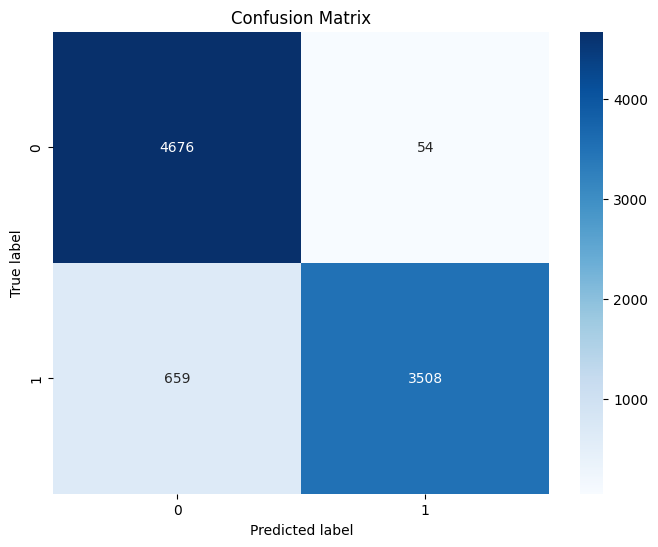

Parameters: {'filters': 32, 'kernel_size': 3, 'pool_size': 2, 'dense_units': 128, 'dropout_rate': 0.5, 'epochs': 20, 'batch_size': 32, 'learning_rate': 0.001, 'use_early_stopping': True, 'patience': 3, 'num_conv_layers': 4}
Test Accuracy: 0.9199
Precision: 0.9848
Recall: 0.8419
F1: 0.9078
Sensitivity: 0.8419
GPU is available.
Epoch 1/20
1340/1340 [==============================] - 13s 7ms/step - loss: 0.2643 - accuracy: 0.8978 - val_loss: 0.2214 - val_accuracy: 0.9171
Epoch 2/20
1340/1340 [==============================] - 10s 7ms/step - loss: 0.2293 - accuracy: 0.9117 - val_loss: 0.2339 - val_accuracy: 0.9181
Epoch 3/20
1340/1340 [==============================] - 10s 8ms/step - loss: 0.2223 - accuracy: 0.9137 - val_loss: 0.2084 - val_accuracy: 0.9203
Epoch 4/20
1340/1340 [==============================] - 9s 7ms/step - loss: 0.2156 - accuracy: 0.9167 - val_loss: 0.2101 - val_accuracy: 0.9184
Epoch 5/20
1340/1340 [==============================] - 10s 8ms/step - loss: 0.2130 - accurac

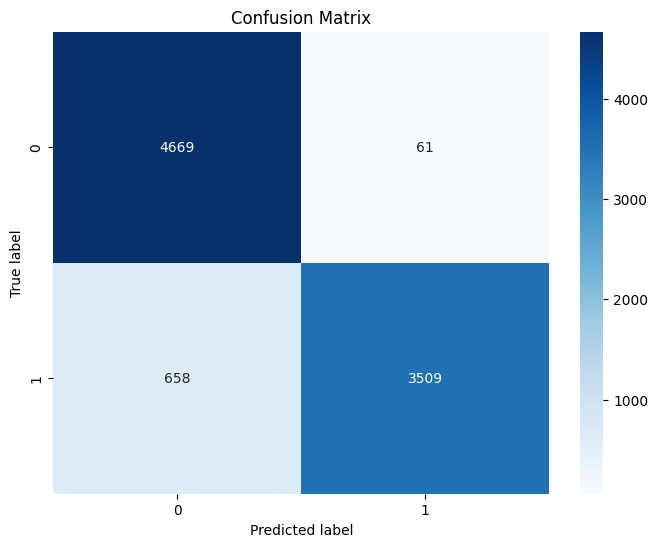

Parameters: {'filters': 64, 'kernel_size': 3, 'pool_size': 2, 'dense_units': 128, 'dropout_rate': 0.5, 'epochs': 20, 'batch_size': 32, 'learning_rate': 0.001, 'use_early_stopping': True, 'patience': 3, 'num_conv_layers': 4}
Test Accuracy: 0.9192
Precision: 0.9829
Recall: 0.8421
F1: 0.9071
Sensitivity: 0.8421
GPU is available.
Epoch 1/20
1340/1340 [==============================] - 12s 7ms/step - loss: 0.2765 - accuracy: 0.8906 - val_loss: 0.2182 - val_accuracy: 0.9154
Epoch 2/20
1340/1340 [==============================] - 10s 7ms/step - loss: 0.2300 - accuracy: 0.9116 - val_loss: 0.2103 - val_accuracy: 0.9191
Epoch 3/20
1340/1340 [==============================] - 10s 7ms/step - loss: 0.2200 - accuracy: 0.9154 - val_loss: 0.2131 - val_accuracy: 0.9175
Epoch 4/20
1340/1340 [==============================] - 8s 6ms/step - loss: 0.2145 - accuracy: 0.9177 - val_loss: 0.2048 - val_accuracy: 0.9203
Epoch 5/20
1340/1340 [==============================] - 10s 7ms/step - loss: 0.2115 - accurac

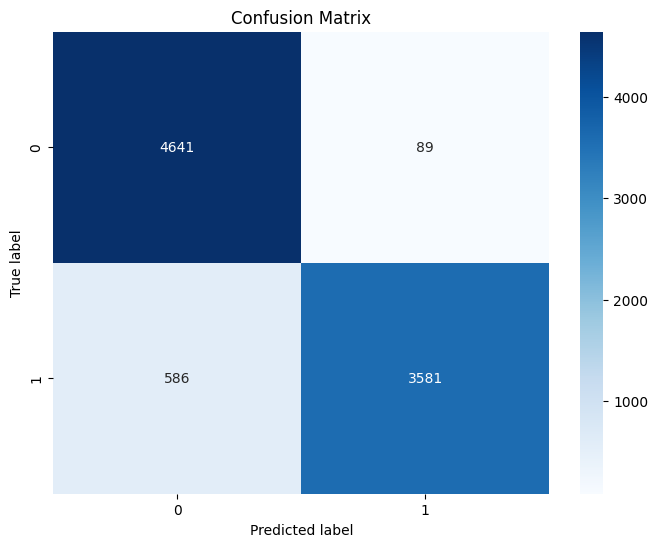

Parameters: {'filters': 16, 'kernel_size': 3, 'pool_size': 2, 'dense_units': 128, 'dropout_rate': 0.5, 'epochs': 20, 'batch_size': 32, 'learning_rate': 0.001, 'use_early_stopping': True, 'patience': 3, 'num_conv_layers': 4}
Test Accuracy: 0.9241
Precision: 0.9757
Recall: 0.8594
F1: 0.9139
Sensitivity: 0.8594
GPU is available.
Epoch 1/20
1340/1340 [==============================] - 21s 13ms/step - loss: 0.2734 - accuracy: 0.8947 - val_loss: 0.2219 - val_accuracy: 0.9166
Epoch 2/20
1340/1340 [==============================] - 18s 13ms/step - loss: 0.2323 - accuracy: 0.9118 - val_loss: 0.2194 - val_accuracy: 0.9151
Epoch 3/20
1340/1340 [==============================] - 18s 13ms/step - loss: 0.2258 - accuracy: 0.9130 - val_loss: 0.2088 - val_accuracy: 0.9191
Epoch 4/20
1340/1340 [==============================] - 18s 13ms/step - loss: 0.2183 - accuracy: 0.9165 - val_loss: 0.2111 - val_accuracy: 0.9213
Epoch 5/20
1340/1340 [==============================] - 18s 13ms/step - loss: 0.2132 - a

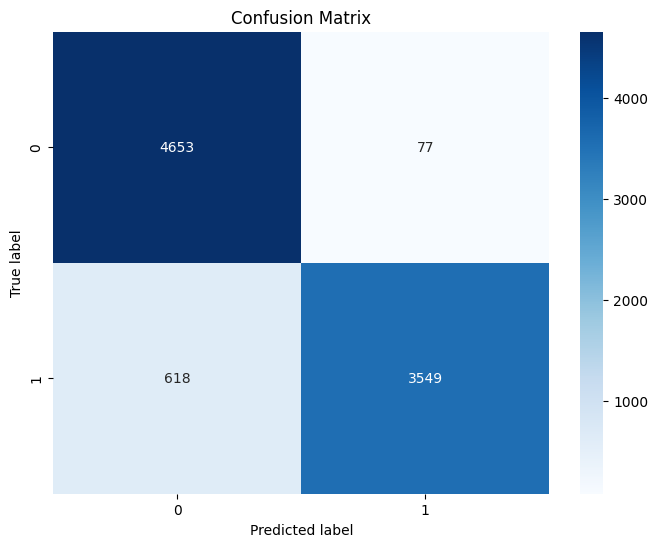

Parameters: {'filters': 128, 'kernel_size': 3, 'pool_size': 2, 'dense_units': 128, 'dropout_rate': 0.5, 'epochs': 20, 'batch_size': 32, 'learning_rate': 0.001, 'use_early_stopping': True, 'patience': 3, 'num_conv_layers': 4}
Test Accuracy: 0.9219
Precision: 0.9788
Recall: 0.8517
F1: 0.9108
Sensitivity: 0.8517
GPU is available.
Epoch 1/20
1340/1340 [==============================] - 14s 8ms/step - loss: 0.2666 - accuracy: 0.8980 - val_loss: 0.2231 - val_accuracy: 0.9168
Epoch 2/20
1340/1340 [==============================] - 11s 8ms/step - loss: 0.2279 - accuracy: 0.9129 - val_loss: 0.2108 - val_accuracy: 0.9158
Epoch 3/20
1340/1340 [==============================] - 10s 8ms/step - loss: 0.2285 - accuracy: 0.9118 - val_loss: 0.2145 - val_accuracy: 0.9183
Epoch 4/20
1340/1340 [==============================] - 11s 8ms/step - loss: 0.2152 - accuracy: 0.9174 - val_loss: 0.2081 - val_accuracy: 0.9208
Epoch 5/20
1340/1340 [==============================] - 11s 8ms/step - loss: 0.2109 - accur

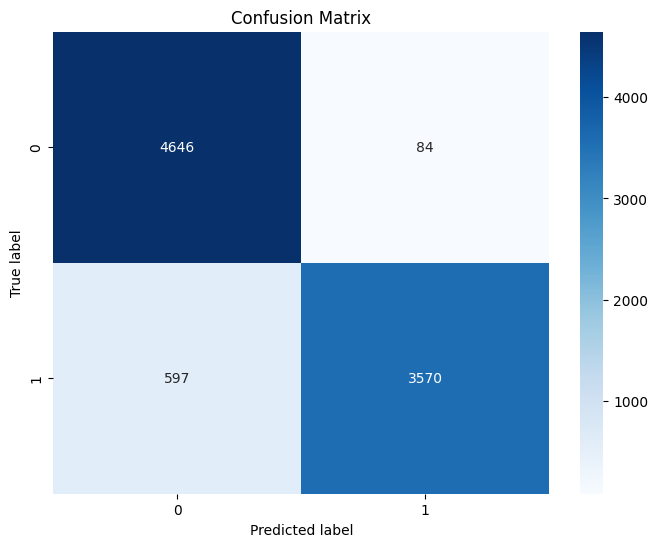

Parameters: {'filters': 64, 'kernel_size': 4, 'pool_size': 2, 'dense_units': 128, 'dropout_rate': 0.5, 'epochs': 20, 'batch_size': 32, 'learning_rate': 0.001, 'use_early_stopping': True, 'patience': 3, 'num_conv_layers': 4}
Test Accuracy: 0.9235
Precision: 0.9770
Recall: 0.8567
F1: 0.9129
Sensitivity: 0.8567
GPU is available.
Epoch 1/20
1340/1340 [==============================] - 15s 9ms/step - loss: 0.2712 - accuracy: 0.8937 - val_loss: 0.2228 - val_accuracy: 0.9152
Epoch 2/20
1340/1340 [==============================] - 11s 8ms/step - loss: 0.2275 - accuracy: 0.9132 - val_loss: 0.2125 - val_accuracy: 0.9173
Epoch 3/20
1340/1340 [==============================] - 10s 8ms/step - loss: 0.2216 - accuracy: 0.9146 - val_loss: 0.2061 - val_accuracy: 0.9200
Epoch 4/20
1340/1340 [==============================] - 11s 8ms/step - loss: 0.2157 - accuracy: 0.9162 - val_loss: 0.2067 - val_accuracy: 0.9226
Epoch 5/20
1340/1340 [==============================] - 11s 8ms/step - loss: 0.2136 - accura

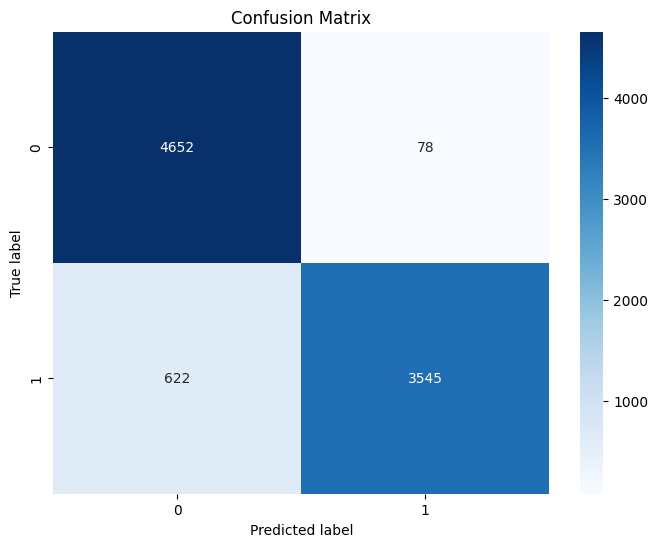

Parameters: {'filters': 64, 'kernel_size': 5, 'pool_size': 2, 'dense_units': 128, 'dropout_rate': 0.5, 'epochs': 20, 'batch_size': 32, 'learning_rate': 0.001, 'use_early_stopping': True, 'patience': 3, 'num_conv_layers': 4}
Test Accuracy: 0.9213
Precision: 0.9785
Recall: 0.8507
F1: 0.9101
Sensitivity: 0.8507
GPU is available.
Epoch 1/20
1340/1340 [==============================] - 16s 10ms/step - loss: 0.2758 - accuracy: 0.8895 - val_loss: 0.2195 - val_accuracy: 0.9177
Epoch 2/20
1340/1340 [==============================] - 11s 8ms/step - loss: 0.2288 - accuracy: 0.9123 - val_loss: 0.2135 - val_accuracy: 0.9172
Epoch 3/20
1340/1340 [==============================] - 11s 8ms/step - loss: 0.2201 - accuracy: 0.9139 - val_loss: 0.2073 - val_accuracy: 0.9189
Epoch 4/20
1340/1340 [==============================] - 12s 9ms/step - loss: 0.2191 - accuracy: 0.9152 - val_loss: 0.2116 - val_accuracy: 0.9196
Epoch 5/20
1340/1340 [==============================] - 12s 9ms/step - loss: 0.2134 - accur

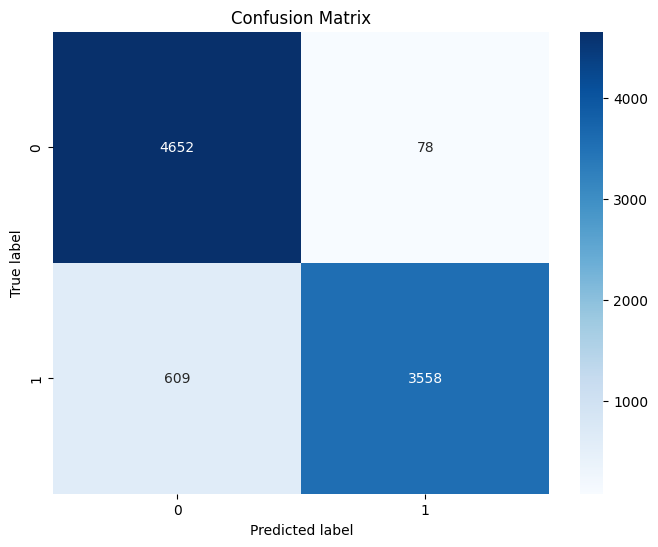

Parameters: {'filters': 64, 'kernel_size': 6, 'pool_size': 2, 'dense_units': 128, 'dropout_rate': 0.5, 'epochs': 20, 'batch_size': 32, 'learning_rate': 0.001, 'use_early_stopping': True, 'patience': 3, 'num_conv_layers': 4}
Test Accuracy: 0.9228
Precision: 0.9785
Recall: 0.8539
F1: 0.9120
Sensitivity: 0.8539
GPU is available.
Epoch 1/20
1340/1340 [==============================] - 17s 10ms/step - loss: 0.2665 - accuracy: 0.8966 - val_loss: 0.2147 - val_accuracy: 0.9166
Epoch 2/20
1340/1340 [==============================] - 12s 9ms/step - loss: 0.2283 - accuracy: 0.9120 - val_loss: 0.2186 - val_accuracy: 0.9136
Epoch 3/20
1340/1340 [==============================] - 12s 9ms/step - loss: 0.2203 - accuracy: 0.9148 - val_loss: 0.2059 - val_accuracy: 0.9200
Epoch 4/20
1340/1340 [==============================] - 13s 9ms/step - loss: 0.2136 - accuracy: 0.9164 - val_loss: 0.2085 - val_accuracy: 0.9211
Epoch 5/20
1340/1340 [==============================] - 12s 9ms/step - loss: 0.2089 - accur

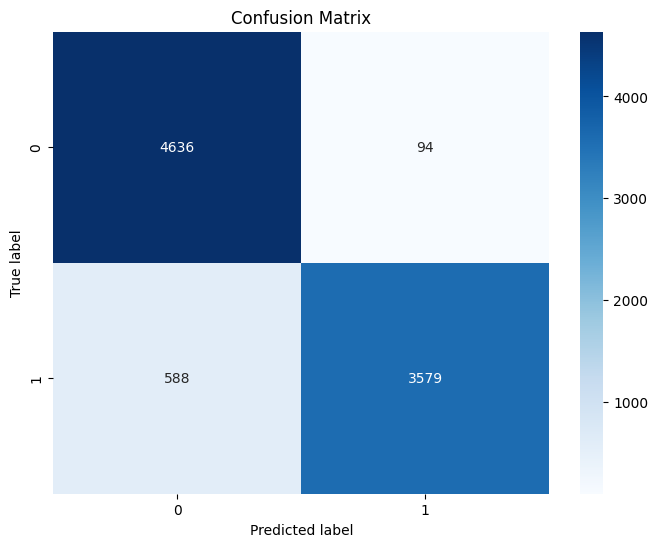

Parameters: {'filters': 64, 'kernel_size': 7, 'pool_size': 2, 'dense_units': 128, 'dropout_rate': 0.5, 'epochs': 20, 'batch_size': 32, 'learning_rate': 0.001, 'use_early_stopping': True, 'patience': 3, 'num_conv_layers': 4}
Test Accuracy: 0.9233
Precision: 0.9744
Recall: 0.8589
F1: 0.9130
Sensitivity: 0.8589
GPU is available.
Epoch 1/20
1340/1340 [==============================] - 13s 8ms/step - loss: 0.2644 - accuracy: 0.8986 - val_loss: 0.2241 - val_accuracy: 0.9164
Epoch 2/20
1340/1340 [==============================] - 10s 7ms/step - loss: 0.2293 - accuracy: 0.9120 - val_loss: 0.2217 - val_accuracy: 0.9155
Epoch 3/20
1340/1340 [==============================] - 10s 8ms/step - loss: 0.2195 - accuracy: 0.9159 - val_loss: 0.2071 - val_accuracy: 0.9189
Epoch 4/20
1340/1340 [==============================] - 11s 8ms/step - loss: 0.2160 - accuracy: 0.9169 - val_loss: 0.2060 - val_accuracy: 0.9201
Epoch 5/20
1340/1340 [==============================] - 9s 7ms/step - loss: 0.2139 - accurac

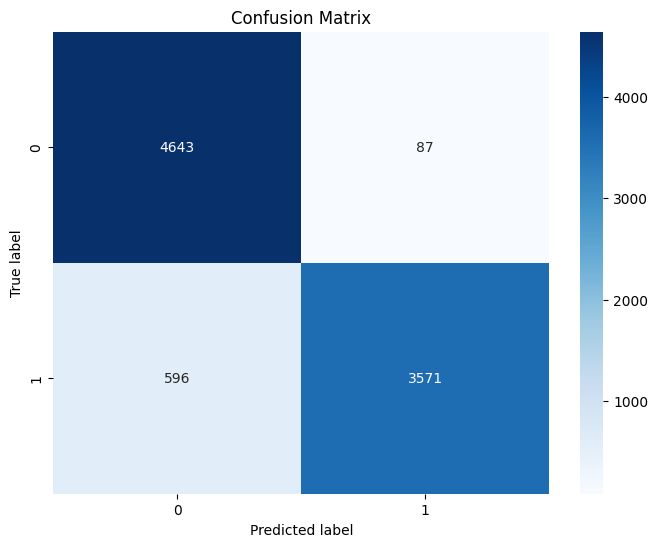

Parameters: {'filters': 64, 'kernel_size': 3, 'pool_size': 2, 'dense_units': 128, 'dropout_rate': 0.5, 'epochs': 20, 'batch_size': 32, 'learning_rate': 0.001, 'use_early_stopping': True, 'patience': 3, 'num_conv_layers': 4}
Test Accuracy: 0.9232
Precision: 0.9762
Recall: 0.8570
F1: 0.9127
Sensitivity: 0.8570
GPU is available.
Epoch 1/20
1340/1340 [==============================] - 13s 8ms/step - loss: 0.2615 - accuracy: 0.8997 - val_loss: 0.2210 - val_accuracy: 0.9144
Epoch 2/20
1340/1340 [==============================] - 9s 7ms/step - loss: 0.2269 - accuracy: 0.9127 - val_loss: 0.2110 - val_accuracy: 0.9181
Epoch 3/20
1340/1340 [==============================] - 10s 8ms/step - loss: 0.2189 - accuracy: 0.9158 - val_loss: 0.2226 - val_accuracy: 0.9150
Epoch 4/20
1340/1340 [==============================] - 11s 8ms/step - loss: 0.2142 - accuracy: 0.9169 - val_loss: 0.2062 - val_accuracy: 0.9212
Epoch 5/20
1340/1340 [==============================] - 10s 8ms/step - loss: 0.2112 - accurac

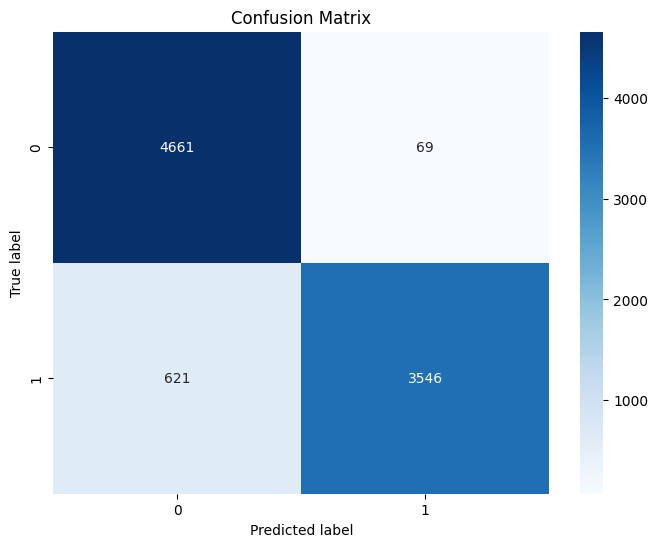

Parameters: {'filters': 64, 'kernel_size': 3, 'pool_size': 2, 'dense_units': 256, 'dropout_rate': 0.5, 'epochs': 20, 'batch_size': 32, 'learning_rate': 0.001, 'use_early_stopping': True, 'patience': 3, 'num_conv_layers': 4}
Test Accuracy: 0.9224
Precision: 0.9809
Recall: 0.8510
F1: 0.9113
Sensitivity: 0.8510
GPU is available.
Epoch 1/20
1340/1340 [==============================] - 14s 9ms/step - loss: 0.2566 - accuracy: 0.8996 - val_loss: 0.2415 - val_accuracy: 0.9142
Epoch 2/20
1340/1340 [==============================] - 11s 8ms/step - loss: 0.2243 - accuracy: 0.9132 - val_loss: 0.2127 - val_accuracy: 0.9201
Epoch 3/20
1340/1340 [==============================] - 12s 9ms/step - loss: 0.2179 - accuracy: 0.9161 - val_loss: 0.2116 - val_accuracy: 0.9195
Epoch 4/20
1340/1340 [==============================] - 11s 9ms/step - loss: 0.2126 - accuracy: 0.9173 - val_loss: 0.2116 - val_accuracy: 0.9181
Epoch 5/20
1340/1340 [==============================] - 11s 8ms/step - loss: 0.2079 - accura

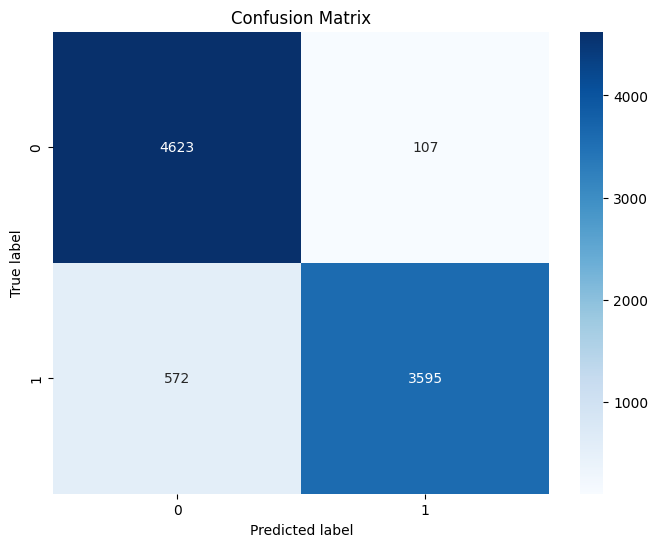

Parameters: {'filters': 64, 'kernel_size': 3, 'pool_size': 2, 'dense_units': 512, 'dropout_rate': 0.5, 'epochs': 20, 'batch_size': 32, 'learning_rate': 0.001, 'use_early_stopping': True, 'patience': 3, 'num_conv_layers': 4}
Test Accuracy: 0.9237
Precision: 0.9711
Recall: 0.8627
F1: 0.9137
Sensitivity: 0.8627
GPU is available.
Epoch 1/20
1340/1340 [==============================] - 16s 10ms/step - loss: 0.2525 - accuracy: 0.9021 - val_loss: 0.2160 - val_accuracy: 0.9163
Epoch 2/20
1340/1340 [==============================] - 13s 9ms/step - loss: 0.2226 - accuracy: 0.9146 - val_loss: 0.2228 - val_accuracy: 0.9188
Epoch 3/20
1340/1340 [==============================] - 13s 9ms/step - loss: 0.2169 - accuracy: 0.9161 - val_loss: 0.2150 - val_accuracy: 0.9193
Epoch 4/20
1340/1340 [==============================] - 13s 9ms/step - loss: 0.2123 - accuracy: 0.9180 - val_loss: 0.2084 - val_accuracy: 0.9220
Epoch 5/20
1340/1340 [==============================] - 13s 10ms/step - loss: 0.2072 - accu

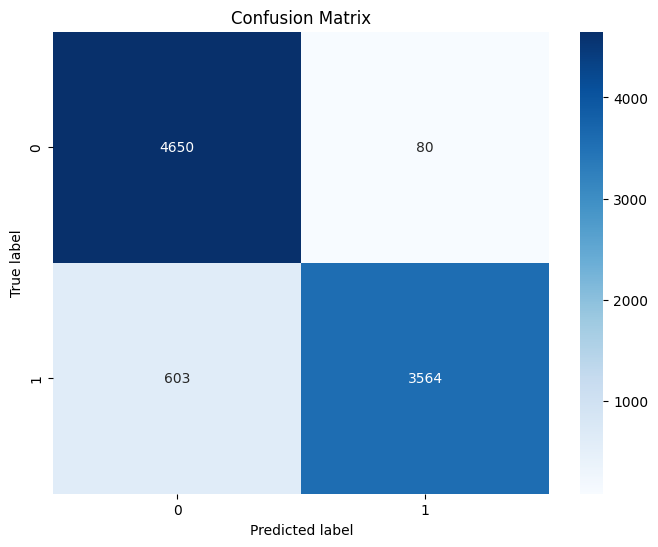

Parameters: {'filters': 64, 'kernel_size': 3, 'pool_size': 2, 'dense_units': 1024, 'dropout_rate': 0.5, 'epochs': 20, 'batch_size': 32, 'learning_rate': 0.001, 'use_early_stopping': True, 'patience': 3, 'num_conv_layers': 4}
Test Accuracy: 0.9232
Precision: 0.9780
Recall: 0.8553
F1: 0.9126
Sensitivity: 0.8553


In [7]:
epoch = 20
hyperparameters_to_test = [

    # Different Filters
    {'filters': 32, 'kernel_size': 3, 'pool_size': 2, 'dense_units': 128, 'dropout_rate': 0.5, 'epochs': epoch, 'batch_size': 32, 'learning_rate': 0.001, 'use_early_stopping': True, 'patience': 3, 'num_conv_layers': 4},
    {'filters': 64, 'kernel_size': 3, 'pool_size': 2, 'dense_units': 128, 'dropout_rate': 0.5, 'epochs': epoch, 'batch_size': 32, 'learning_rate': 0.001, 'use_early_stopping': True, 'patience': 3, 'num_conv_layers': 4},
    {'filters': 16, 'kernel_size': 3, 'pool_size': 2, 'dense_units': 128, 'dropout_rate': 0.5, 'epochs': epoch, 'batch_size': 32, 'learning_rate': 0.001, 'use_early_stopping': True, 'patience': 3, 'num_conv_layers': 4},
    {'filters': 128, 'kernel_size': 3, 'pool_size': 2, 'dense_units': 128, 'dropout_rate': 0.5, 'epochs': epoch, 'batch_size': 32, 'learning_rate': 0.001, 'use_early_stopping': True, 'patience': 3, 'num_conv_layers': 4},

    #Different Kernel Sizes
    {'filters': 64, 'kernel_size': 4, 'pool_size': 2, 'dense_units': 128, 'dropout_rate': 0.5, 'epochs': epoch, 'batch_size': 32, 'learning_rate': 0.001, 'use_early_stopping': True, 'patience': 3, 'num_conv_layers': 4},
    {'filters': 64, 'kernel_size': 5, 'pool_size': 2, 'dense_units': 128, 'dropout_rate': 0.5, 'epochs': epoch, 'batch_size': 32, 'learning_rate': 0.001, 'use_early_stopping': True, 'patience': 3, 'num_conv_layers': 4},
    {'filters': 64, 'kernel_size': 6, 'pool_size': 2, 'dense_units': 128, 'dropout_rate': 0.5, 'epochs': epoch, 'batch_size': 32, 'learning_rate': 0.001, 'use_early_stopping': True, 'patience': 3, 'num_conv_layers': 4},
    {'filters': 64, 'kernel_size': 7, 'pool_size': 2, 'dense_units': 128, 'dropout_rate': 0.5, 'epochs': epoch, 'batch_size': 32, 'learning_rate': 0.001, 'use_early_stopping': True, 'patience': 3, 'num_conv_layers': 4},

    #Different Dense Units
    {'filters': 64, 'kernel_size': 3, 'pool_size': 2, 'dense_units': 128, 'dropout_rate': 0.5, 'epochs': epoch, 'batch_size': 32, 'learning_rate': 0.001, 'use_early_stopping': True, 'patience': 3, 'num_conv_layers': 4},
    {'filters': 64, 'kernel_size': 3, 'pool_size': 2, 'dense_units': 256, 'dropout_rate': 0.5, 'epochs': epoch, 'batch_size': 32, 'learning_rate': 0.001, 'use_early_stopping': True, 'patience': 3, 'num_conv_layers': 4},
    {'filters': 64, 'kernel_size': 3, 'pool_size': 2, 'dense_units': 512, 'dropout_rate': 0.5, 'epochs': epoch, 'batch_size': 32, 'learning_rate': 0.001, 'use_early_stopping': True, 'patience': 3, 'num_conv_layers': 4},
    {'filters': 64, 'kernel_size': 3, 'pool_size': 2, 'dense_units': 1024, 'dropout_rate': 0.5, 'epochs': epoch, 'batch_size': 32, 'learning_rate': 0.001, 'use_early_stopping': True, 'patience': 3, 'num_conv_layers': 4}

    #Different Dropout
    #{'filters': 64, 'kernel_size': 3, 'pool_size': 2, 'dense_units': 128, 'dropout_rate': 0.4, 'epochs': epoch, 'batch_size': 32, 'learning_rate': 0.001, 'use_early_stopping': True, 'patience': 3, 'num_conv_layers': 4},
    #{'filters': 64, 'kernel_size': 3, 'pool_size': 2, 'dense_units': 128, 'dropout_rate': 0.3, 'epochs': epoch, 'batch_size': 32, 'learning_rate': 0.001, 'use_early_stopping': True, 'patience': 3, 'num_conv_layers': 4},
    #{'filters': 64, 'kernel_size': 3, 'pool_size': 2, 'dense_units': 128, 'dropout_rate': 0.2, 'epochs': epoch, 'batch_size': 32, 'learning_rate': 0.001, 'use_early_stopping': True, 'patience': 3, 'num_conv_layers': 4},
    #{'filters': 64, 'kernel_size': 3, 'pool_size': 2, 'dense_units': 128, 'dropout_rate': 0.1, 'epochs': epoch, 'batch_size': 32, 'learning_rate': 0.001, 'use_early_stopping': True, 'patience': 3, 'num_conv_layers': 4},

    #Different Batch Size
    #{'filters': 64, 'kernel_size': 3, 'pool_size': 2, 'dense_units': 128, 'dropout_rate': 0.5, 'epochs': epoch, 'batch_size': 64, 'learning_rate': 0.001, 'use_early_stopping': True, 'patience': 3, 'num_conv_layers': 4},
    #{'filters': 64, 'kernel_size': 3, 'pool_size': 2, 'dense_units': 128, 'dropout_rate': 0.5, 'epochs': epoch, 'batch_size': 128, 'learning_rate': 0.001, 'use_early_stopping': True, 'patience': 3, 'num_conv_layers': 4},
    #{'filters': 64, 'kernel_size': 3, 'pool_size': 2, 'dense_units': 128, 'dropout_rate': 0.5, 'epochs': epoch, 'batch_size': 256, 'learning_rate': 0.001, 'use_early_stopping': True, 'patience': 3, 'num_conv_layers': 4},
    #{'filters': 64, 'kernel_size': 3, 'pool_size': 2, 'dense_units': 128, 'dropout_rate': 0.5, 'epochs': epoch, 'batch_size': 512, 'learning_rate': 0.001, 'use_early_stopping': True, 'patience': 3, 'num_conv_layers': 4}

    ]

cnn_results = []

for params in hyperparameters_to_test:
    test_acc, precision, recall, f1, sensitivity = build_train_test_cnn_model(X_train, Y_train, X_val, Y_val, X_test, Y_test, **params)
    cnn_results.append((params, test_acc, precision, recall, f1, sensitivity))
    print(f"Parameters: {params}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1: {f1:.4f}")
    print(f"Sensitivity: {sensitivity:.4f}")
    print("===================")

In [ ]:
parameters = [str(params) for params, _, _, _, _, _ in cnn_results]
test_results = [result for _, result, _, _, _, _ in cnn_results]

plt.figure(figsize=(8, 12))

plt.barh(parameters, test_results, color='skyblue', height=0.5)
plt.xlabel('Test Results')
plt.ylabel('Parameters')
plt.title('CNN Model Test Results for Different Parameters, 10 Epochs')
plt.xlim(min(test_results) - 0.01, max(test_results) + 0.01)

plt.savefig('./MyDrive/MyDrive/metriseis_data/cnn_results.png')

plt.show()

In [ ]:
file_path = './MyDrive/MyDrive/metriseis_data/cnn_results.csv'

with open(file_path, 'w') as file:
    file.write("Parameters,Accuracy,Pecision,Recall,F1,Sensitivity\n")

    for params, result, precision, recall, f1, sensitivity in cnn_results:
        parameters_str = '_'.join(f"{key}_{value}" for key, value in params.items())
        file.write(f"{parameters_str},{result},{precision},{recall},{f1},{sensitivity}\n")